In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkit as nk

In [9]:
G = nk.readGraph("./MIT8.edgelist", nk.Format.EdgeListTabZero)

In [10]:
print(G.numberOfNodes(), G.numberOfEdges())

6440 251252


In [31]:
# a)
cc = nk.components.ConnectedComponents(G)
cc.run()
print("Number of components:", cc.numberOfComponents())
C = cc.extractLargestConnectedComponent(G)

Number of components: 18


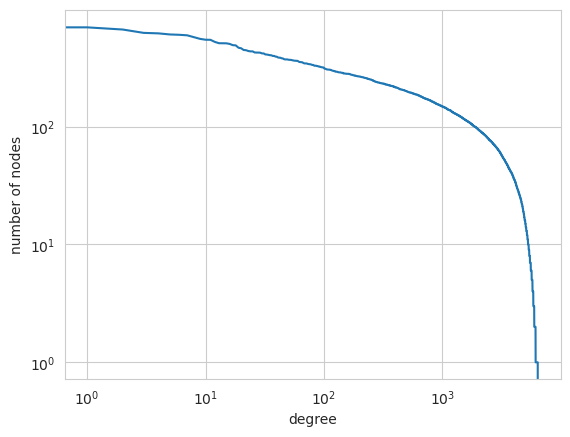

In [32]:
# b)
dd = sorted(nk.centrality.DegreeCentrality(C).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

In [48]:
try:
    import powerlaw
    fit = powerlaw.Fit(dd)
except ImportError:
    print ("Module powerlaw could not be loaded")
    
try:
    import powerlaw
    print("Steigung: (fit.alpha)", fit.alpha)
except ImportError:
      print ("Module powerlaw could not be loaded")
        
try:
    import powerlaw
    print(fit.distribution_compare('power_law','exponential'))
except ImportError:
      print ("Module powerlaw could not be loaded")

Steigung: (fit.alpha) 5.273931238827299
(2.810479355657068, 0.2878054585734008)


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


## b) 

The powerlaw is preferred over the exponential

Die Kurve sieht nicht nach einem reinen Powerlaw aus - vielleicht aber nach zwei verbundenen

In [67]:
# c) 

apsp = nk.distance.APSP(C)
apsp.run()
print(apsp.getDistance(0, 123))

# das sollte man nicht auf dem Server machen, da dieser schnell überlastet sein könnte

2.0


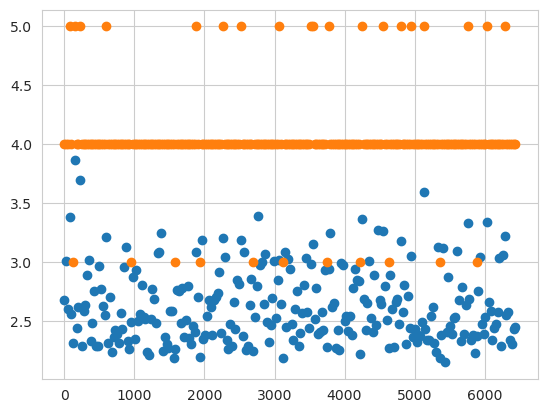

In [101]:
counter = 0;
sources = []
# 0., 25., 50., ... werden genommen
for n in C.iterNodes():
    if (counter % 25 == 0):
            sources.append(n)
    counter += 1

spsp = nk.distance.SPSP(C, sources)

# Run
spsp.run();

allMeans = []
allMax = []

for source in sources:
    sumOfDistances = 0
    curMax = 0
    for target in sources:
        distance = spsp.getDistance(source, target)
        sumOfDistances += distance
        if (distance > curMax):
            curMax = distance
    allMeans.append(sumOfDistances / len(sources))
    allMax.append(curMax)
    
#plt.scatter(sources[0:30], allMeans[0:30]);
#plt.scatter(sources[0:30], allMax[0:30]);
#plt.show();

plt.scatter(sources, allMeans);
plt.scatter(sources, allMax);
plt.show();

## d)
Es sieht nach einem sehr dichten Graphen aus. Die medianen Abstände sehen annähernd gleichverteilt aus. 